In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
ls

'My Drive'/


In [0]:
import tensorflow as tf

In [3]:
!tf_upgrade_v2 --infile heart.ipynb --outfile heart-upgraded.ipynb

Extracting code lines from original notebook
Traceback (most recent call last):
  File "/usr/local/bin/tf_upgrade_v2", line 10, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/tools/compatibility/tf_upgrade_v2_main.py", line 139, in main
    args.input_file, output_file, upgrade)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/tools/compatibility/tf_upgrade_v2_main.py", line 43, in process_file
    ipynb.process_file(in_filename, out_filename, upgrader)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/tools/compatibility/ipynb.py", line 40, in process_file
    raw_code, notebook = _get_code(in_filename)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/tools/compatibility/ipynb.py", line 108, in _get_code
    with open(input_file) as in_file:
FileNotFoundError: [Errno 2] No such file or directory: 'heart.ipynb'


In [12]:
tf.__version__

'2.0.0-dev20190703'

In [0]:
%load_ext tensorboard

In [0]:
!rm -rf ./logs/

In [8]:
!pip show tensorflow

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, keras-applications, protobuf, tensorboard, wrapt, wheel, google-pasta, numpy, grpcio, gast, tensorflow-estimator, absl-py, termcolor, six, astor
Required-by: stable-baselines, magenta, fancyimpute


In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [10]:
train = pd.read_excel('heart.train.xlsx')
test = pd.read_excel("heart.test.xlsx")
train.shape

(162, 14)

In [11]:
train.describe()

,age,sex,chest pain type (4 values),resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,"resting electrocardiographic results (values 0,1,2)",maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect,class
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,54.845679,0.691358,3.092593,130.561728,247.753086,0.172840,1.067901,151.734568,0.314815,1.033333,1.574074,0.629630,4.635802,1.419753
std,8.959932,0.463365,0.970404,18.059578,55.569448,0.379281,0.997678,22.975221,0.465882,1.117061,0.628570,0.904707,1.920003,0.495049
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,49.000000,0.000000,3.000000,120.000000,209.500000,0.000000,0.000000,139.250000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,2.000000,157.000000,0.000000,0.800000,1.500000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,276.750000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,7.000000,2.000000


In [0]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

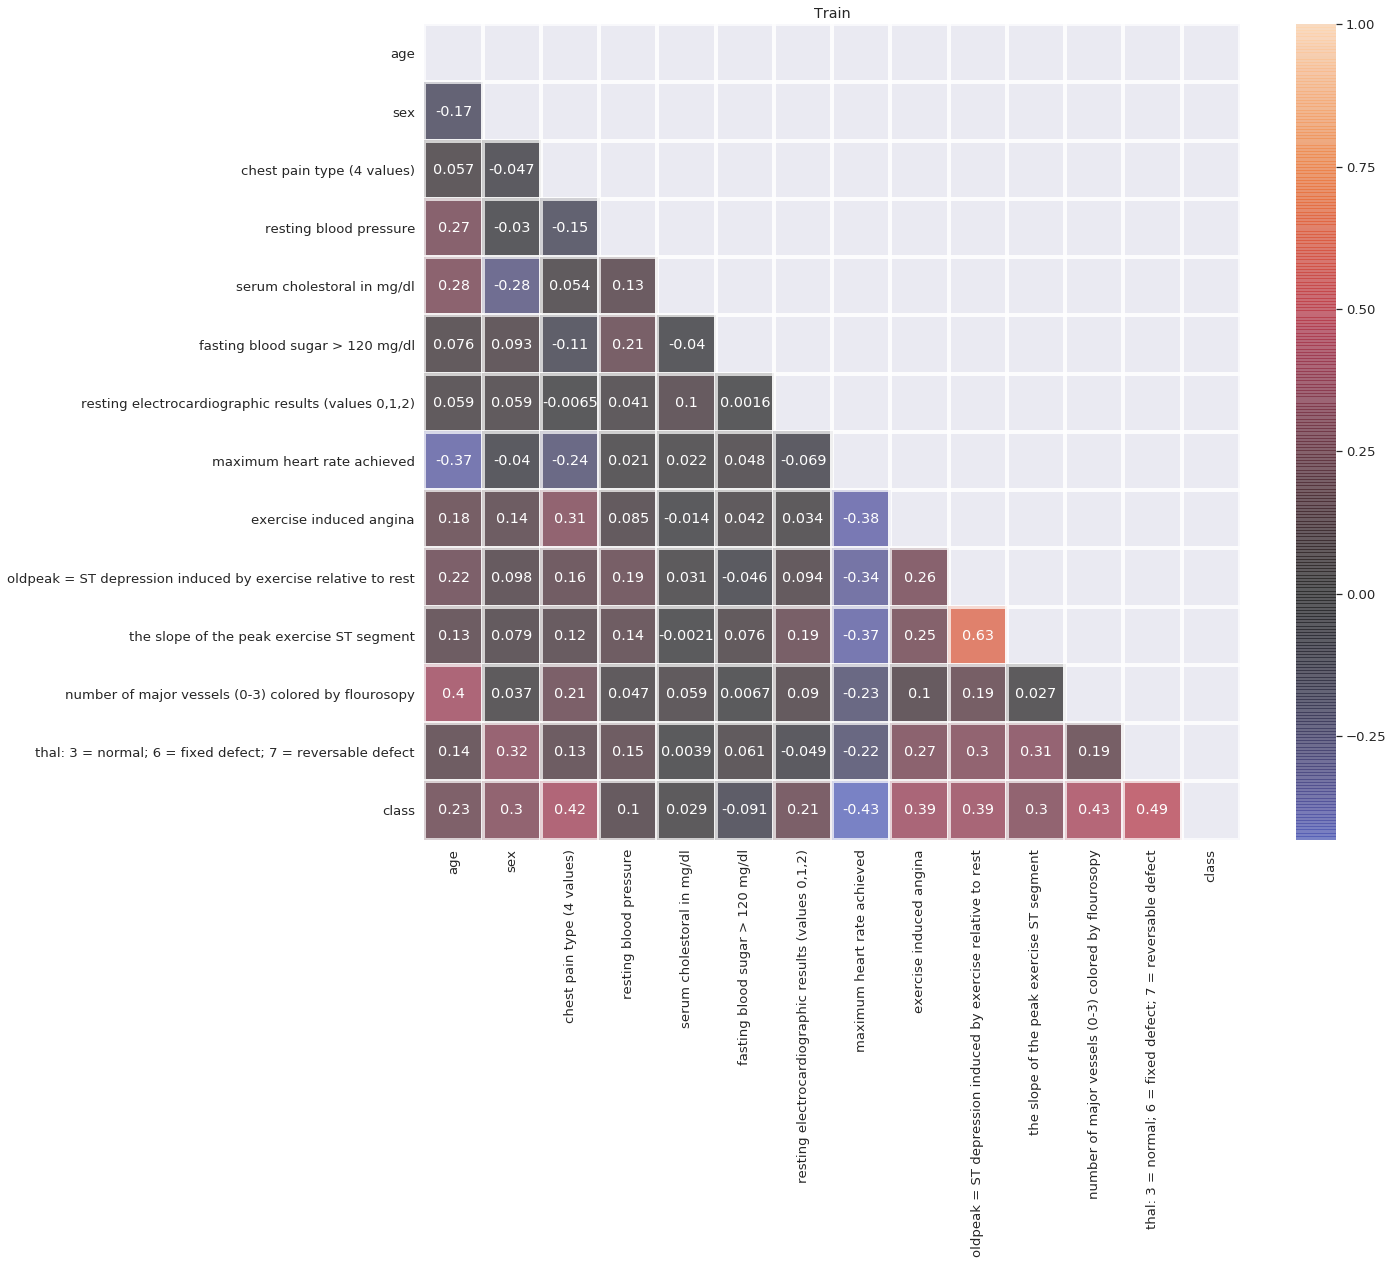

In [14]:
plot_df(train, 'Train')

In [15]:
print(train.columns)

Index(['age', 'sex', 'chest pain type (4 values)', 'resting blood pressure',
       'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl',
       'resting electrocardiographic results (values 0,1,2)',
       'maximum heart rate achieved', 'exercise induced angina',
       'oldpeak = ST depression induced by exercise relative to rest',
       'the slope of the peak exercise ST segment',
       'number of major vessels (0-3) colored by flourosopy',
       'thal: 3 = normal; 6 = fixed defect; 7 = reversable defect', 'class'],
      dtype='object')


In [16]:
class_name = input("Chooese the class: ")

Chooese the class: class


In [0]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [18]:
scaler = input("Choose the Scaler: ")

Choose the Scaler: minmax


In [0]:
if scaler == 'standard':
  scaler = standard_scaler
elif scaler == 'minmax':
  scaler = minmax_scaler

In [20]:
tr_ans = train[class_name]
ts_ans = test[class_name]
class_count = len(tr_ans.unique())
print(class_count)

2


In [0]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [22]:
tr_data

,age,sex,chest pain type (4 values),resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,"resting electrocardiographic results (values 0,1,2)",maximum heart rate achieved,exercise induced angina,oldpeak = ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels (0-3) colored by flourosopy,thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,74,0,2,120,269,0,2,121,1,0.2,1,1,3
3,56,1,3,130,256,1,2,142,1,0.6,2,1,6
4,59,1,4,110,239,0,2,142,1,1.2,2,1,7
5,60,1,4,140,293,0,2,170,0,1.2,2,2,7
6,63,0,4,150,407,0,2,154,0,4.0,2,3,7
7,44,1,3,140,235,0,2,180,0,0.0,1,0,3
8,57,0,4,128,303,0,2,159,0,0.0,1,1,3
9,46,1,4,140,311,0,0,120,1,1.8,2,2,7


In [0]:
#결측치 채우기 if 결측치가 0일 경우

# from sklearn.preprocessing import Imputer

# rep_0 = Imputer(missing_values=0, strategy="mean", axis=0)

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

In [0]:
tr_data = scaler.fit_transform(tr_data)
ts_data = scaler.transform(ts_data)
tr_ans, _ = tr_ans.factorize()
ts_ans, _ = ts_ans.factorize()
tr_ans = np.array(tr_ans)
ts_ans = np.array(ts_ans)

In [0]:
#about tensorboard


# import os
# from datetime import datetime

# now = datetime.utcnow().strftime("&Y&m%d%H%M%S")
# root_logdir = "tf_logs"
# logdir = "{}/run-{}".format(root_logdir, now)
# #%tensorboard --logdir logs

# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
import tensorflow.keras.metrics as km
from sklearn import metrics
from tensorflow.keras.regularizers import l2

from tensorboard.plugins.hparams import api as hp

In [27]:
tf.__version__

'2.0.0-dev20190703'

In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from functools import partial

In [0]:
import os
from datetime import datetime

In [0]:
leaky_relu = tf.nn.leaky_relu

# HP_NUM_HIDDEN_LAYERS = hp.HParam('num_hidden_layer', hp.Discrete([2,4,8,16]))
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32, 64, 128]))
# HP_INIT_MODE = hp.HParam('init_mode', hp.Discrete(['glorot_normal', 'he_normal']))
# HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['elu', leaky_relu]))
METRIC_ACCURACY = 'accuracy'
HP_NUM_HIDDEN_LAYERS = hp.HParam('num_hidden_layer', hp.Discrete([2]))
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_INIT_MODE = hp.HParam('init_mode', hp.Discrete(['he_normal']))
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['leaky_relu']))

with tf.summary.create_file_writer('logs/hparam_tuning/').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_HIDDEN_LAYERS, HP_NUM_UNITS, HP_INIT_MODE, HP_ACTIVATION],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [53]:

def create_hp_model(hparams):
  model = Sequential()
  model.add(Dense(hparams[HP_NUM_HIDDEN_LAYERS], input_dim=len(tr_data.T), kernel_initializer=HP_INIT_MODE, activation=HP_ACTIVATION, kernel_regularizer=l2(0.001)))
  model.add(Dropout(0.2))
  for i in range(HP_NUM_HIDDEN_LAYERS):
    
    model.add(Dense(HP_NUM_UNITS, kernel_initializer=HP_INIT_MODE, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation(HP_ACTIVATION))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count-1, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
  model.fit(tr_data, tr_ans, epochs=32)
  _, accuracy = model.evaluate(ts_data, ts_ans)    
                          
  return accuracy
                        
                         
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = create_hp_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)


session_num = 0
for num_hidden_layer in HP_NUM_HIDDEN_LAYERS.domain.values:
  for num_units in HP_NUM_UNITS.domain.values:
    for init_mode in HP_INIT_MODE.domain.values:
      for activation in HP_ACTIVATION.domain.values:
        hparams = {
            HP_NUM_HIDDEN_LAYERS : num_hidden_layer,
            HP_NUM_UNITS : num_units,
            HP_INIT_MODE : init_mode,
            HP_ACTIVATION : activation
        }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run('logs/hparam_tuning/' + run_name, hparams)
        session_num += 1

--- Starting trial: run-0
{'num_hidden_layer': 2, 'num_units': 16, 'init_mode': 'he_normal', 'activation': 'leaky_relu'}


TypeError: ignored

In [0]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [0]:
#for GridSearch

#hidden_layers = [4,8,16, 32]
# hidden_layers = [4,8]
# neurons = [32, 64, 128, 256]
# neurons = [32]
# activation = ['elu', leaky_relu]
# activation = ['elu']
# init_mode = ['glorot_normal', 'he_normal']
# init_mode = ['he_normal']

# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#   model = Sequential()
#   model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation, kernel_regularizer=l2(0.001)))
#   model.add(Dropout(0.2))
#   for i in range(hidden_layers):
    
#     model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=l2(0.001)))
#     model.add(BatchNormalization())
#     model.add(Activation(activation))
#     model.add(Dropout(0.2))
  
#   if class_count == 2:  
#     model.add(Dense(1,activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#   elif class_count != 2:
#     model.add(Dense(class_count-1, activation='softmax'))
#     model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model


# keras_model = KerasClassifier(build_fn=create_model, epochs=8, batch_size=8)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= 1, cv=3)



# grid_result = grid.fit(tr_data, tr_ans)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
# pred = grid.predict(ts_data)

# accuracy = accuracy_score(pred, ts_ans)
# ts_ans = ts_ans.astype(float)
# precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
# conf_mat = confusion_matrix(ts_ans, pred)
# print("Accuracy = ", accuracy)
# print("Confusion Matrix")
# print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
# print("")
# print("Classification Report")
# print(metrics.classification_report(ts_ans, pred))